In [11]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify = y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)


In [13]:
tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [14]:
from plot_utils import plot_decision_regions

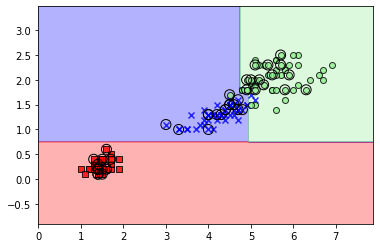

In [15]:
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

In [17]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [19]:
dot_data = export_graphviz(tree,
                          filled=True,
                          class_names=['Setosa',
                                      'Versicolor',
                                      'Virginica'],
                          feature_names=['petal length',
                                        'petal width'],
                          out_file = None)

In [20]:
graph = graph_from_dot_data(dot_data)


In [21]:
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

# Combining Multiple decsion trees via random fores

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
forest = RandomForestClassifier(criterion='gini',
                               n_estimators=25,
                               random_state=1, 
                               n_jobs=2)


In [24]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

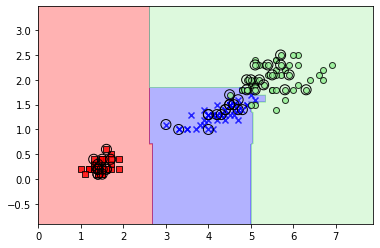

In [25]:
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))